In [6]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from scipy.signal import correlate2d

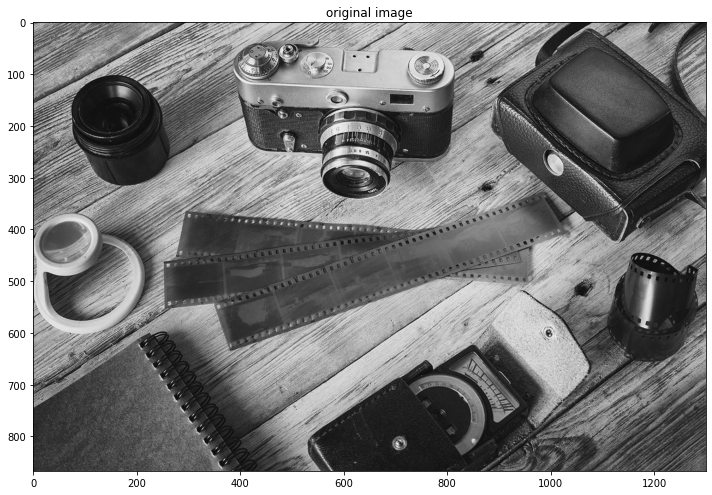

In [12]:
image = cv2.imread('log.png', 0) # our image has one channel

plt.rcParams["figure.figsize"] = [10, 10]
plt.title('original image')
plt.imshow(image, cmap='gray')
plt.show()

In [13]:
def rescale(image):
    s = image.astype(float)
    s -= np.min(s)
    s /= np.max(s)

    return (s*255).astype(np.uint8)

In [19]:
"""
Formula of Log;

s = c.log(1+r)

c:constant

Assume that r >= 0

""" 

'\nFormula;\n\ns = c.log(1+r)\n\nc:constant\n\nAssume that r >= 0\n\n'

In [14]:
def Log_transformation(r, c):
  r = r.astype(float)
  s = c * np.log(1+r)
  s = rescale(s)

  return s

In [38]:
"""
Formula of Inv Log;

s = c.exp(r^1/c) - 1

c:constant

Assume that r >= 0

""" 

'\nFormula of Inv Log;\n\ns = c.exp(r^1/c) - 1\n\nc:constant\n\nAssume that r >= 0\n\n'

In [31]:
def Inv_Log_transformation(r, c):
  r = r.astype(float)
  s = np.exp(r**1/c) - 1
  s = rescale(s)

  return s

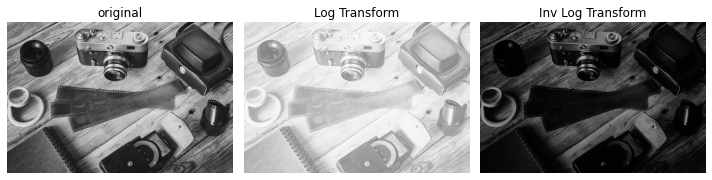

In [37]:
"""
Log and Inverse Log Transformations

Log => Log transformation map a narrow range of low intensity value in the input into a wider range of output levels.
       We use a transformation of this type to expand the value of dark pixels in an image while compressing the higher-level values.

Inverse Log => Inverse Log transformation map a narrow range of high intensity value in the input into a wider range of output levels.
               We use a transformation of this type to compressing the value of dark pixels in an image while expand the higher-level values.
"""

# you can define c(constant) as what you want 

image_logTransform = Log_transformation(image, c=10)
image_logTransform = rescale(image_logTransform)

image_InvlogTransform = Inv_Log_transformation(image, c=60)
image_InvlogTransform = rescale(image_InvlogTransform)

# Display images
plt.rcParams["figure.figsize"] = [10, 10]
plt.rcParams["figure.autolayout"] = True

fig, ax = plt.subplots(nrows=1, ncols=3)

ax[0].axis('off')
ax[0].title.set_text('original')
ax[0].imshow(image, cmap='gray')

ax[1].axis('off')
ax[1].title.set_text('Log Transform')
ax[1].imshow(image_logTransform, cmap='gray')

ax[2].axis('off')
ax[2].title.set_text('Inv Log Transform')
ax[2].imshow(image_InvlogTransform, cmap='gray')